# Paper figures

In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
from math import isnan
from test_nea import generate
from test_nea import getData

In [2]:
def file_to_posterior_samples(filename):
    with open(filename) as f:
        lines = f.read().splitlines()
    postSamp = np.array([ list(map(float,l.split(" "))) for l in lines ])
    return postSamp

def file_to_posterior_samples_1comp(filename):
    with open(filename) as f:
        lines = f.read().splitlines()
    postSamp = np.array([ list(map(float,l.split(" "))) for l in lines ])
    postSamp = np.transpose(np.transpose(postSamp)[0:2])
    return postSamp

def file_to_posterior_samples_2comp(filename):
    with open(filename) as f:
        lines = f.read().splitlines()
    postSamp = np.array([ list(map(float,l.split(" "))) for l in lines ])
    postSamp = np.transpose(np.array([np.transpose(postSamp)[i] for i in [0,1,2,3,5]]))
    return postSamp

def file_to_posterior_samples_2comp_overlap(filename):
    with open(filename) as f:
        lines = f.read().splitlines()
    postSamp = np.array([ list(map(float,l.split(" "))) for l in lines ])
    postSamp = np.transpose(np.array([np.transpose(postSamp)[i] for i in [0,1,2,3,4,5,6]]))
    return postSamp

In [3]:
data_RV = getData.NEA_to_dict("test_nea/sample_rv/planets_RV.csv")
data_HAT = getData.NEA_to_dict("test_nea/sample_HAT/planets_HAT.csv")
data_WASP = getData.NEA_to_dict("test_nea/sample_WASP/planets_WASP.csv")
data_Kepler = getData.Santerne_to_dict("test_nea/sample_Kepler/TableKeplerGiants.tex")

xlist_RV = getData.create_Stan_input_ordered(data_RV)['x']
xlist_HAT = getData.create_Stan_input_ordered(data_HAT)['x']
xlist_WASP = getData.create_Stan_input_ordered(data_WASP)['x']
xlist_Kepler = getData.create_Stan_input_ordered(data_Kepler)['x']

# <center> Figures of data </center>

In [4]:
from matplotlib.transforms import Bbox, TransformedBbox, \
    blended_transform_factory

from mpl_toolkits.axes_grid1.inset_locator import BboxPatch, BboxConnector,\
    BboxConnectorPatch


def connect_bbox(bbox1, bbox2,
                 loc1a, loc2a, loc1b, loc2b,
                 prop_lines, prop_patches=None):
    if prop_patches is None:
        prop_patches = prop_lines.copy()
        prop_patches["alpha"] = prop_patches.get("alpha", 1)*0.2

    c1 = BboxConnector(bbox1, bbox2, loc1=loc1a, loc2=loc2a, **prop_lines)
    c1.set_clip_on(False)
    c2 = BboxConnector(bbox1, bbox2, loc1=loc1b, loc2=loc2b, **prop_lines)
    c2.set_clip_on(False)

    bbox_patch1 = BboxPatch(bbox1, **prop_patches)
    bbox_patch2 = BboxPatch(bbox2, **prop_patches)

    p = BboxConnectorPatch(bbox1, bbox2,
                           # loc1a=3, loc2a=2, loc1b=4, loc2b=1,
                           loc1a=loc1a, loc2a=loc2a, loc1b=loc1b, loc2b=loc2b,
                           **prop_patches)
    p.set_clip_on(False)

    return c1, c2, bbox_patch1, bbox_patch2, p


def zoom_effect01(ax1, ax2, xmin, xmax, **kwargs):
    """
    ax1 : the main axes
    ax1 : the zoomed axes
    (xmin,xmax) : the limits of the colored area in both plot axes.

    connect ax1 & ax2. The x-range of (xmin, xmax) in both axes will
    be marked.  The keywords parameters will be used ti create
    patches.

    """

    trans1 = blended_transform_factory(ax1.transData, ax1.transAxes)
    trans2 = blended_transform_factory(ax2.transData, ax2.transAxes)

    bbox = Bbox.from_extents(xmin, 1, xmax, 0)

    mybbox1 = TransformedBbox(bbox, trans1)
    mybbox2 = TransformedBbox(bbox, trans2)

    prop_patches = kwargs.copy()
    prop_patches["ec"] = "none"
    prop_patches["color"] = "gainsboro"
    prop_patches["alpha"] = 1.0

    c1, c2, bbox_patch1, bbox_patch2, p = \
        connect_bbox(mybbox1, mybbox2,
                     loc1a=3, loc2a=2, loc1b=4, loc2b=1,
                     prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p

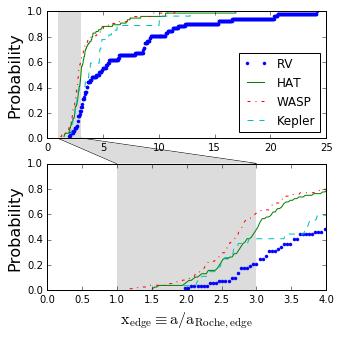

In [5]:
plt.figure(1, figsize=(5, 5))
ax1 = plt.subplot(212)
ax2 = plt.subplot(211)
ax1.set_xlim(0, 4)
ax2.set_xlim(0, 25)
zoom_effect01(ax1, ax2, 1, 3)

values, base_rv = np.histogram(xlist_RV, bins=500)
cum_rv = np.cumsum(values)/len(xlist_RV)

values, base_HAT = np.histogram(xlist_HAT, bins=500)
cum_HAT = np.cumsum(values)/len(xlist_HAT)

values, base_WASP = np.histogram(xlist_WASP, bins=500)
cum_WASP = np.cumsum(values)/len(xlist_WASP)

values, base_Kepler = np.histogram(xlist_Kepler, bins=500)
cum_Kepler = np.cumsum(values)/len(xlist_Kepler)

ax1.plot(base_rv[:-1], cum_rv,'.')
ax1.plot(base_HAT[:-1], cum_HAT,'-')
ax1.plot(base_WASP[:-1], cum_WASP,'-.')
ax1.plot(base_Kepler[:-1], cum_Kepler,'--')

ax2.plot(base_rv[:-1], cum_rv,'.')
ax2.plot(base_HAT[:-1], cum_HAT,'-')
ax2.plot(base_WASP[:-1], cum_WASP,'-.')
ax2.plot(base_Kepler[:-1], cum_Kepler,'--')
ax2.legend(["RV","HAT","WASP","Kepler"], loc=4)

ax1.set_xlabel(r"$\rm x_{edge}\equiv a/a_{Roche,edge}$", fontsize=16)
ax2.set_ylabel("Probability", fontsize=16)
ax1.set_ylabel("Probability", fontsize=16)
plt.savefig("figures/xdist_cum.eps",dpi=300)

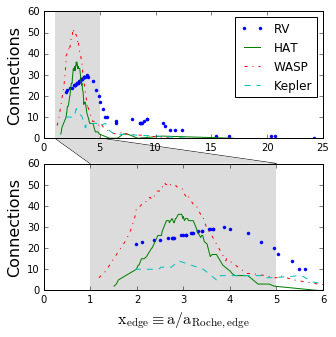

In [6]:
from operator import itemgetter

def read_sybil_data(filename):
    with open(filename) as f:
        data = f.readlines()[9:]
    data = [ list(map(float,item.strip().split(","))) for item in data ]
    data = np.transpose(sorted(data, key=itemgetter(1)))[1:3]
    return data

NFA_data_rv = read_sybil_data("sybil_results/nea/planets_RV/planets_RV_coef_data_0_1.81.csv")
NFA_data_HAT = read_sybil_data("sybil_results/nea/planets_HAT/planets_HAT_coef_data_0_0.46.csv")
NFA_data_WASP = read_sybil_data("sybil_results/nea/planets_WASP/planets_WASP_coef_data_0_0.84.csv")
NFA_data_Kepler = read_sybil_data("sybil_results/nea/planets_Kepler/planets_Kepler_coef_data_0_0.94.csv")

plt.figure(1, figsize=(5, 5))
ax1 = plt.subplot(212)
ax2 = plt.subplot(211)
ax1.set_xlim(0, 6)
ax2.set_xlim(0, 25)
zoom_effect01(ax1, ax2, 1, 5)

ax1.plot(NFA_data_rv[0], NFA_data_rv[1], '.')
ax1.plot(NFA_data_HAT[0], NFA_data_HAT[1], '-')
ax1.plot(NFA_data_WASP[0], NFA_data_WASP[1], '-.')
ax1.plot(NFA_data_Kepler[0], NFA_data_Kepler[1], '--')

ax2.plot(NFA_data_rv[0], NFA_data_rv[1], '.')
ax2.plot(NFA_data_HAT[0], NFA_data_HAT[1], '-')
ax2.plot(NFA_data_WASP[0], NFA_data_WASP[1], '-.')
ax2.plot(NFA_data_Kepler[0], NFA_data_Kepler[1], '--')
ax2.legend(["RV","HAT","WASP","Kepler"])

ax1.set_xlabel(r"$\rm x_{edge}\equiv a/a_{Roche,edge}$", fontsize=16)
ax2.set_ylabel("Connections", fontsize=16)
ax1.set_ylabel("Connections", fontsize=16)

plt.savefig("figures/xdist_nbfreq.eps",dpi=300)

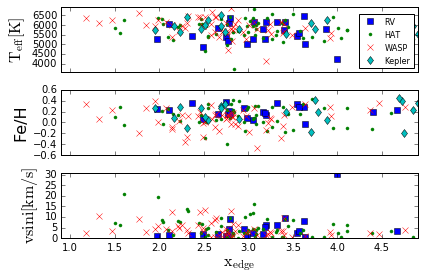

In [7]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)

key="tem"
ax1.plot(xlist_RV, data_RV[key], 's')
ax1.plot(xlist_HAT, data_HAT[key], '.')
ax1.plot(xlist_WASP, data_WASP[key], 'x')
ax1.plot(xlist_Kepler, data_Kepler['teff'], 'd')
ax1.set_ylabel(r"$\rm T_{eff} [K]$", fontsize=16)
ax1.set_ylim(3550., 6950.)
ax1.legend(["RV","HAT","WASP","Kepler"], numpoints=1, loc=4, fontsize=8)

key="feh"
ax2.plot(xlist_RV, data_RV[key], 's')
ax2.plot(xlist_HAT, data_HAT[key], '.')
ax2.plot(xlist_WASP, data_WASP[key], 'x')
ax2.plot(xlist_Kepler, data_Kepler[key], 'd')
ax2.set_ylabel("Fe/H", fontsize=16)

key="vsi"
ax3.plot(xlist_RV, data_RV[key], 's')
ax3.plot(xlist_HAT, data_HAT[key], '.')
ax3.plot(xlist_WASP, data_WASP[key], 'x')
ax3.set_ylabel(r"$\rm v\sin{i} [km/s]$", fontsize=16)
ax3.set_ylim(0.,31.)

plt.xlabel(r"$\rm x_{edge}$", fontsize=16)

f.subplots_adjust(hspace=0)

plt.xlim(0.9,4.9)
plt.tight_layout()
plt.savefig("figures/xdist_stars.eps", dpi=100)

# <center> Functions for following contour plots </center>

In [8]:
import scipy.optimize as so

def find_confidence_interval(x, pdf, confidence_level):
    return pdf[pdf > x].sum() - confidence_level


def compute_contour_parameters(xlist, ylist, xbsize, ybsize):

    xbins = xbsize
    ybins = ybsize

    H, xedges, yedges = np.histogram2d(xlist, ylist, bins=(xbins,ybins), normed=True)
    x_bin_sizes = (xedges[1:] - xedges[:-1]).reshape((1,xbins))
    y_bin_sizes = (yedges[1:] - yedges[:-1]).reshape((ybins,1))
 
    pdf = (H*(x_bin_sizes*y_bin_sizes))

    one_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.68))
    two_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.95))
    lvls = [two_sigma, one_sigma]

    X, Y = 0.5*(xedges[1:]+xedges[:-1]), 0.5*(yedges[1:]+yedges[:-1])
    Z = pdf.T
    return X, Y, Z, lvls

In [9]:
def plot_contour_solid(xlist, ylist, xbins, ybins, ax=plt, colors=['grey','black'], hatches=[None]):
    X1, Y1, Z1, levels1 = compute_contour_parameters(xlist, ylist, xbins, ybins)
    contour = ax.contourf(X1, Y1, Z1, levels=levels1+[1.], colors=colors, origin="lower", hatches=hatches)

    fmt = {}
    strs = ["95%","68%"]
    for l,s in zip( contour.levels, strs ):
        fmt[l] = s
        
    return contour


def plot_contour_lines(xlist, ylist, xbins, ybins, ax=plt, colors=['red','red'], linestyles=['solid','dashed']):
    X1, Y1, Z1, levels1 = compute_contour_parameters(xlist, ylist, xbins, ybins)
    contour = ax.contour(X1, Y1, Z1, levels=levels1, colors=colors, linewidths=[2.5, 2.5], \
                        linestyles=linestyles, origin="lower");

    fmt = {}
    strs = ["95%","68%"]
    for l,s in zip( contour.levels, strs ):
        fmt[l] = s
        
    return contour

# <center> RV/Kepler/RV+Kepler planets </center>

In [10]:
postSamp_RV = file_to_posterior_samples_1comp("test_nea/sample_rv/postSamp_rvall_1comp.txt").T
postSamp_RV_sigmas = file_to_posterior_samples_1comp("test_nea/sample_rv/postSamp_rvall_1comp_sigmas.txt").T

postSamp_Kep = file_to_posterior_samples_1comp("test_nea/sample_Kepler/postSamp_Kepler_1comp.txt").T
postSamp_Kep_sigmas = file_to_posterior_samples_1comp("test_nea/sample_Kepler/postSamp_Kepler_1comp_sigmas.txt").T

postSamp_rvKep = file_to_posterior_samples_1comp("test_nea/sample_rv+Kepler/postSamp_rv+Kepler_1comp.txt").T
postSamp_rvKep_sigmas = file_to_posterior_samples_1comp("test_nea/sample_rv+Kepler/postSamp_rv+Kepler_1comp_sigmas.txt").T

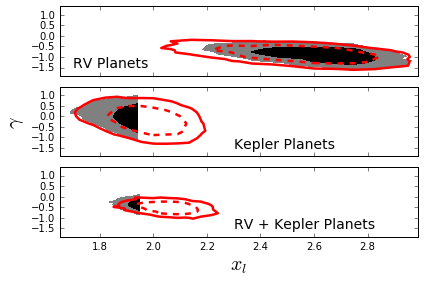

In [11]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)

plot_contour_solid(postSamp_RV[1], postSamp_RV[0], 20, 20, ax=ax1)
plot_contour_lines(postSamp_RV_sigmas[1], postSamp_RV_sigmas[0], 20, 20, ax=ax1)
plot_contour_solid(postSamp_Kep[1], postSamp_Kep[0], 20, 20, ax=ax2)
plot_contour_lines(postSamp_Kep_sigmas[1], postSamp_Kep_sigmas[0], 20, 20, ax=ax2)
plot_contour_solid(postSamp_rvKep[1], postSamp_rvKep[0], 20, 20, ax=ax3)
plot_contour_lines(postSamp_rvKep_sigmas[1], postSamp_rvKep_sigmas[0], 20, 20, ax=ax3)

ax1.text(1.7, -1.5, "RV Planets", fontsize=14)
ax2.text(2.3, -1.5, "Kepler Planets", fontsize=14)
ax3.text(2.3, -1.5, "RV + Kepler Planets", fontsize=14)

f.subplots_adjust(hspace=0)

plt.xlim(1.65, 2.99)
plt.ylim(-1.9, 1.4)
plt.xlabel(r"$x_l$", fontsize=20)
ax2.set_ylabel(r"$\rm \gamma$", fontsize=20)
plt.tight_layout()
plt.savefig("figures/results_RV_Kepler.eps", dpi=300)

In [12]:
import pymc

In [13]:
#compute Gelman-Rubin stats for each parameter
array = np.split(postSamp_rvKep_sigmas[0],np.linspace(1000,9000,9))
pymc.gelman_rubin(array)

//anaconda/lib/python3.5/site-packages/numpy/lib/shape_base.py:422: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sub_arys.append(_nx.swapaxes(sary[st:end], axis, 0))


1.0504328876113462

# <center>HAT/WASP/HAT+WASP planets</center>

In [14]:
postSamp_HAT = file_to_posterior_samples_2comp_overlap("test_nea/sample_HAT/postSamp_HAT_2comp_2xl_overlap.txt").T
postSamp_HAT_sigmas = file_to_posterior_samples_2comp_overlap("test_nea/sample_HAT/postSamp_HAT_2comp_2xl_overlap_sigmas.txt").T

postSamp_WASP = file_to_posterior_samples_2comp_overlap("test_nea/sample_WASP/postSamp_WASP_2comp_2xl_overlap.txt").T
postSamp_WASP_sigmas = file_to_posterior_samples_2comp_overlap("test_nea/sample_WASP/postSamp_WASP_2comp_2xl_overlap_sigmas.txt").T

postSamp_HATWASP = file_to_posterior_samples_2comp_overlap("test_nea/sample_HAT+WASP/postSamp_HAT+WASP_2comp_2xl_overlap.txt").T
postSamp_HATWASP_sigmas = file_to_posterior_samples_2comp_overlap("test_nea/sample_HAT+WASP/postSamp_HAT+WASP_2comp_2xl_overlap_sigmas.txt").T

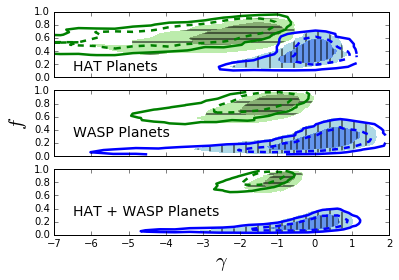

In [15]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)


plot_contour_solid(postSamp_HAT[2], postSamp_HAT[0], 20, 20, colors=['lightblue','cornflowerblue'], \
                   hatches=['|','||'], ax=ax1)
plot_contour_lines(postSamp_HAT_sigmas[2], postSamp_HAT_sigmas[0], 20, 20, ax=ax1, colors=['blue','blue'])

plot_contour_solid(postSamp_HAT[3], postSamp_HAT[1], 20, 20, colors=['lightsage','sage'],\
                   hatches=['-','--'], ax=ax1)
plot_contour_lines(postSamp_HAT_sigmas[3], postSamp_HAT_sigmas[1], 20, 20, colors=['green','green'], ax=ax1)


plot_contour_solid(postSamp_WASP[2], postSamp_WASP[0], 20, 20, colors=['lightblue','cornflowerblue'], \
                   hatches=['|','||'], ax=ax2)
plot_contour_lines(postSamp_WASP_sigmas[2], postSamp_WASP_sigmas[0], 20, 20, ax=ax2, colors=['blue','blue'])

plot_contour_solid(postSamp_WASP[3], postSamp_WASP[1], 20, 20, colors=['lightsage','sage'],\
                   hatches=['-','--'], ax=ax2)
plot_contour_lines(postSamp_WASP_sigmas[3], postSamp_WASP_sigmas[1], 20, 20, colors=['green','green'], ax=ax2)


plot_contour_solid(postSamp_HATWASP[2], postSamp_HATWASP[0], 20, 20, colors=['lightblue','cornflowerblue'], \
                   hatches=['|','||'],ax=ax3)
plot_contour_lines(postSamp_HATWASP_sigmas[2], postSamp_HATWASP_sigmas[0], 20, 20, ax=ax3, colors=['blue','blue'])

plot_contour_solid(postSamp_HATWASP[3], postSamp_HATWASP[1], 20, 20, colors=['lightsage','sage'],\
                   hatches=['-','--'], ax=ax3)
plot_contour_lines(postSamp_HATWASP_sigmas[3], postSamp_HATWASP_sigmas[1], 20, 20, colors=['green','green'], ax=ax3)


ax1.text(-6.5, 0.1, "HAT Planets", fontsize=14)
ax2.text(-6.5, 0.3, "WASP Planets", fontsize=14)
ax3.text(-6.5, 0.3, "HAT + WASP Planets", fontsize=14)

ax2.set_ylim(0.0,1.0)

plt.subplots_adjust(hspace=0.2)

plt.xlim(-7.,2.)
plt.xlabel(r"$\gamma$", fontsize=20)
ax2.set_ylabel(r'$f$', fontsize=20)
#ax2.annotate(r'$f$', (0., 1.05), xytext=(-30, 0),
#                    textcoords='offset points', xycoords='axes fraction',
#                    ha='right', va='center', size=20, rotation=90)
plt.savefig("figures/results_HAT_WASP_comps.eps", dpi=300)

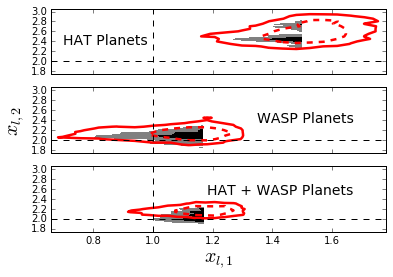

In [16]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)

plot_contour_solid(postSamp_HAT[4], postSamp_HAT[5], 30, 30, ax=ax1)
plot_contour_lines(postSamp_HAT_sigmas[4], postSamp_HAT_sigmas[5], 20, 20, ax=ax1)

plot_contour_solid(postSamp_WASP[4], postSamp_WASP[5], 30, 30, ax=ax2)
plot_contour_lines(postSamp_WASP_sigmas[4], postSamp_WASP_sigmas[5], 20, 20, ax=ax2)

plot_contour_solid(postSamp_HATWASP[4], postSamp_HATWASP[5], 20, 20, ax=ax3)
plot_contour_lines(postSamp_HATWASP_sigmas[4], postSamp_HATWASP_sigmas[5], 20, 20, ax=ax3)

ax1.text(0.70, 2.35, "HAT Planets", fontsize=14)
ax2.text(1.35, 2.35, "WASP Planets", fontsize=14)
ax3.text(1.18, 2.50, "HAT + WASP Planets", fontsize=14)

f.subplots_adjust(hspace=0.2)

plt.xlim(0.66, 1.78)

ax1.axvline(1., 0., 4., color='black', linestyle='dashed')
ax2.axvline(1., 0., 4., color='black', linestyle='dashed')
ax3.axvline(1., 0., 4., color='black', linestyle='dashed')

ax1.axhline(2., 0., 4., color='black', linestyle='dashed')
ax2.axhline(2., 0., 4., color='black', linestyle='dashed')
ax3.axhline(2., 0., 4., color='black', linestyle='dashed')


plt.xlabel(r"$x_{l,1}$", fontsize=20)
ax2.set_ylabel(r'$x_{l,2}$', fontsize=20)
#ax2.annotate(r'$x_{l,2}$', (0., 1.05), xytext=(-25, 0),
#                    textcoords='offset points', xycoords='axes fraction',
#                    ha='right', va='center', size=20, rotation=90)
plt.savefig("figures/results_HAT_WASP_xls.eps", dpi=300)

In [17]:
a=5

array = np.split(postSamp_HATWASP[a],list(np.linspace(1000,9000,9)))
print(pymc.gelman_rubin(array))

1.02759252779


//anaconda/lib/python3.5/site-packages/numpy/lib/shape_base.py:422: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sub_arys.append(_nx.swapaxes(sary[st:end], axis, 0))


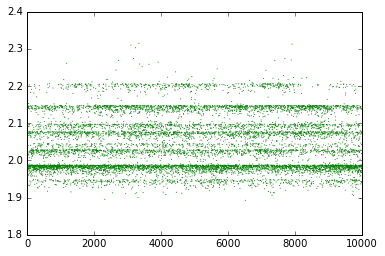

In [18]:
#plt.scatter(np.linspace(0.,10000.,10000), postSamp_HAT_sigmas[a], edgecolors='None', s=1, color='b')
#plt.scatter(np.linspace(0.,10000.,10000), postSamp_WASP_sigmas[a], edgecolors='None', s=1, color='r')
plt.scatter(np.linspace(0.,10000.,10000), postSamp_HATWASP[a], edgecolors='None', s=1, color='g')
plt.xlim(0.,10000.)
plt.show()

# <center> Synthetic Data </center>

In [19]:
postSamp_synth_100 = file_to_posterior_samples_2comp_overlap("test_nea/sample_synthetic/postSamp_synthetic_2comp_2xl_overlap_n=100.txt").T
postSamp_synth_500 = file_to_posterior_samples_2comp_overlap("test_nea/sample_synthetic/postSamp_synthetic_2comp_2xl_overlap_n=500.txt").T
postSamp_synth_1000 = file_to_posterior_samples_2comp_overlap("test_nea/sample_synthetic/postSamp_synthetic_2comp_2xl_overlap_n=1000.txt").T

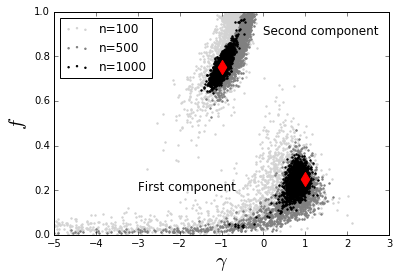

In [20]:
a=5
plt.scatter(postSamp_synth_100[2][0::a], postSamp_synth_100[0][0::a], color='lightgray', s=2),
plt.scatter(postSamp_synth_500[2][0::a], postSamp_synth_500[0][0::a], color='gray', s=2)
plt.scatter(postSamp_synth_1000[2][0::a], postSamp_synth_1000[0][0::a], color="black", s=2)

plt.legend(["n=100","n=500","n=1000"], loc=2)

plt.scatter(postSamp_synth_100[3][0::a], postSamp_synth_100[1][0::a], color='lightgray', s=2)
plt.scatter(postSamp_synth_500[3][0::a], postSamp_synth_500[1][0::a], color='gray', s=2)
plt.scatter(postSamp_synth_1000[3][0::a], postSamp_synth_1000[1][0::a], color="black", s=2)

plt.text(0., 0.9, "Second component", fontsize=12)
plt.text(-3, 0.2, "First component", fontsize=12)


plt.scatter([-1],[0.75], marker='d', s=100, color='red')
plt.scatter([1],[0.25], marker='d', s=100, color='red')

plt.xlim(-5., 3.)
plt.ylim(0., 1.)
plt.xlabel(r"$\gamma$", fontsize=20)
plt.ylabel(r"$f$", fontsize=20)
plt.savefig("figures/results_synth_comps.eps",dpi=300)

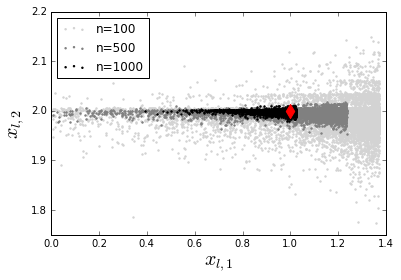

In [21]:
plt.scatter(postSamp_synth_100[4], postSamp_synth_100[5], color='lightgray', s=2),
plt.scatter(postSamp_synth_500[4], postSamp_synth_500[5], color='gray', s=2)
plt.scatter(postSamp_synth_1000[4], postSamp_synth_1000[5], color="black", s=2)

plt.legend(["n=100","n=500","n=1000"], loc=2)

plt.scatter([1.],[2.], marker='d', s=100, color='red')

plt.xlim(0.,1.4)
plt.xlabel(r"$x_{l,1}$", fontsize=20)
plt.ylabel(r'$x_{l,2}$', fontsize=20)

plt.savefig("figures/results_synth_xls.eps",dpi=300)
plt.show()

In [22]:
x=1
aa = np.percentile(postSamp_HATWASP_sigmas[x], 15.9)
bb = np.percentile(postSamp_HATWASP_sigmas[x], 50.0)
cc = np.percentile(postSamp_HATWASP_sigmas[x], 84.1)

print(bb, cc-bb, bb-aa)

0.853952606115 0.0643225091572 0.0869565253108
